## Mini-Batch and Stochastic GD

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt

To have a dataset or set of data points, generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [3]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [5]:
a, b = -2, 1
y = a*X + b
y


array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

In [7]:
def gradient_descent(X, y, alpha, iterations):
    theta_0, theta_1 = 0, 0
    m = X.shape[0]
    costs, thetas_0, thetas_1 = [], [], []
    thetas_0.append(theta_0)
    thetas_1.append(theta_1)
    for i in range(iterations):
        hypothesis = theta_0 + (theta_1 * X)
        
        cost = (1/(2*m)) * ((np.linalg.norm(hypothesis - y))**2)
        costs.append(cost)
        
        error = hypothesis - y
        gradient = [1/m * error.sum() , 1/m *  error@X]

        theta_0 = theta_0 - alpha * gradient[0]
        theta_1 = theta_1 - alpha * gradient[1]
        
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
    cost = (1/(2*m)) * ((np.linalg.norm(hypothesis - y))**2)
    costs.append(cost)
    return costs, thetas_0, thetas_1


In [8]:
alpha = 0.01
iterations=300
costs, thetas_0, thetas_1 = gradient_descent(X, y, alpha, iterations)

#### Calculate r2 score

In [9]:
def calc_r2(thetas_0, thetas_1):
    hypothesis = thetas_0[-1] + (thetas_1[-1] * X)
    from sklearn.metrics import r2_score
    return r2_score(y, hypothesis)

In [10]:
print('R2 score: ', calc_r2(thetas_0, thetas_1))

R2 score:  0.9994801045771846


#### Plot loss vs. epochs

In [11]:
def plots(iterations, costs, thetas_0, thetas_1):
    iterations = iterations + 1
    plt.plot(np.linspace(1,iterations,num=iterations), costs)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    plt.plot(thetas_0, costs)
    plt.xlabel('theta 0')
    plt.ylabel('Loss')
    plt.show()
    plt.plot(thetas_1, costs)
    plt.xlabel('theta 1')
    plt.ylabel('Loss')
    plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

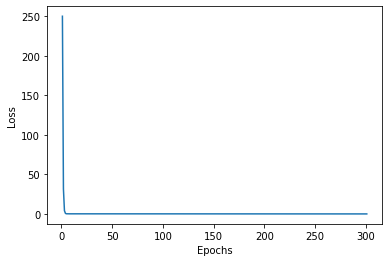

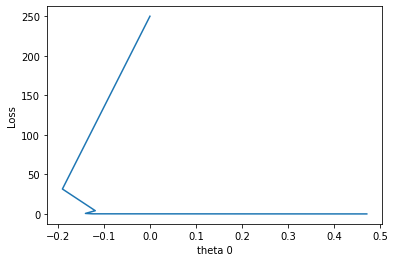

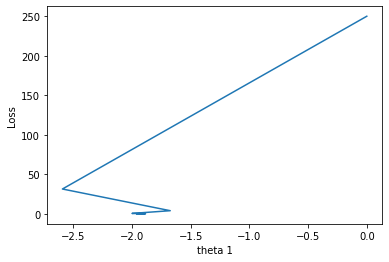

In [12]:
plots(iterations, costs, thetas_0, thetas_1)

#### Plot all regression lines till converge

In [13]:
def plot_regression_lines(thetas_0, thetas_1, iterations):
    for i in range(iterations):
        hypothesis = thetas_0[i] + (thetas_1[i] * X)
        plt.scatter(X, y)
        plt.plot(X, hypothesis)

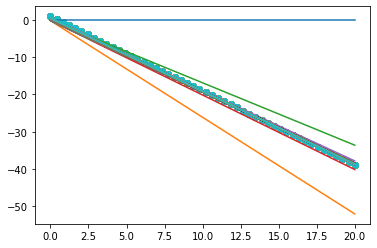

In [14]:
plot_regression_lines(thetas_0, thetas_1, iterations)

#### Plot the best regression line

In [15]:
def plot_best_line(thetas_0, thetas_1):
    hypothesis = thetas_0[-1] + (thetas_1[-1] * X)
    plt.scatter(X, y)
    plt.plot(X, hypothesis, 'r')

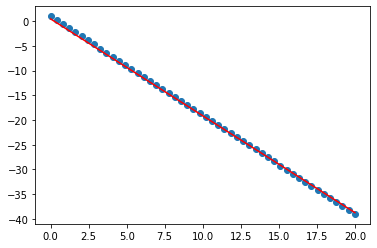

In [16]:
plot_best_line(thetas_0, thetas_1)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [17]:
iterations = 50
alpha = 0.01
costs, thetas_0, thetas_1 = gradient_descent(X, y, alpha, iterations)

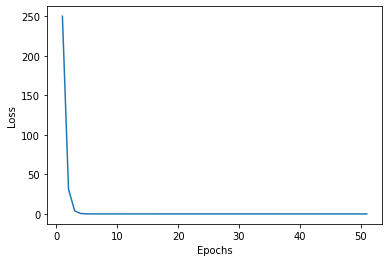

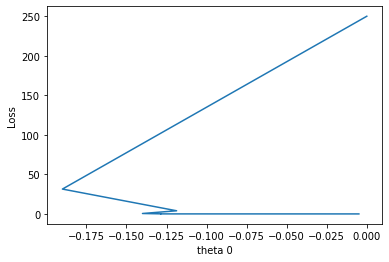

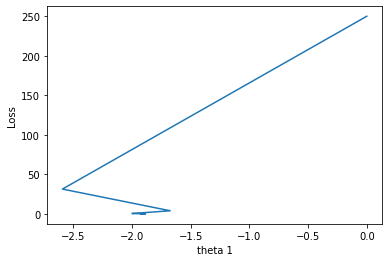

In [18]:
plots(iterations, costs, thetas_0, thetas_1)

In [19]:
iterations = 50
alpha = 0.1
costs, thetas_0, thetas_1 = gradient_descent(X, y, alpha, iterations)

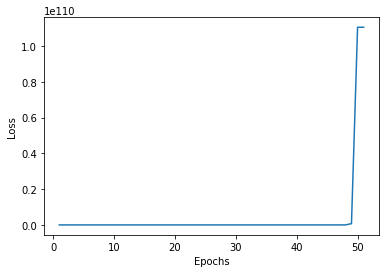

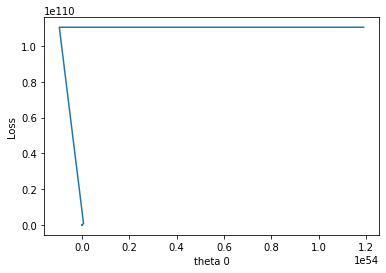

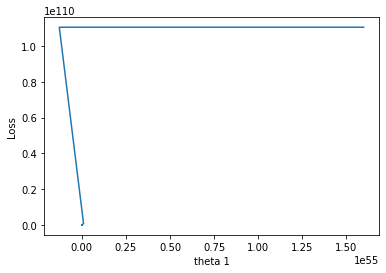

In [20]:
plots(iterations, costs, thetas_0, thetas_1)

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect

In [21]:
def plot_regression_lines(thetas_0, thetas_1, iterations):
    for i in range(1,iterations, 10):
        hypothesis = thetas_0[i] + (thetas_1[i] * X)
        plt.scatter(X, y)
        plt.plot(X, hypothesis)

In [22]:
def mini_batch(X, y, alpha, epochs, batch_size):
    theta_0, theta_1 = 0, 0
    costs, thetas_0, thetas_1 = [], [], []
    thetas_0.append(theta_0)
    thetas_1.append(theta_1)
    X_batches = np.array([X[i:i + batch_size] for i in range(0, len(X), batch_size)])
    y_batches = np.array([y[i:i + batch_size] for i in range(0, len(y), batch_size)])
    for j in range(epochs):
        for i in range(X_batches.shape[0]):
            hypothesis = theta_0 + (theta_1 * X_batches[i])

            cost = (1/(2*batch_size)) * ((np.linalg.norm(hypothesis - y_batches[i]))**2)
            costs.append(cost)
            
            error = hypothesis - y_batches[i]
            gradient = [1/batch_size * error.sum() , 1/batch_size *  error@X_batches[i]]

            theta_0 = theta_0 - alpha * gradient[0]
            theta_1 = theta_1 - alpha * gradient[1]

            thetas_0.append(theta_0)
            thetas_1.append(theta_1)
    cost = (1/(2*batch_size)) * ((np.linalg.norm(hypothesis - y_batches[i]))**2)
    costs.append(cost)
    return costs, thetas_0, thetas_1

In [23]:
batch_size = 5
alpha = 0.0001
epochs = 1000
costs, thetas_0, thetas_1 = mini_batch(X, y, alpha, epochs, batch_size)

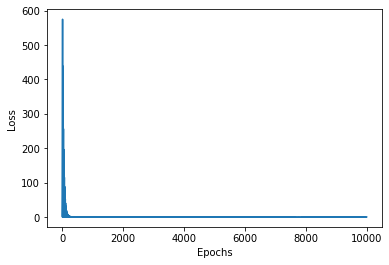

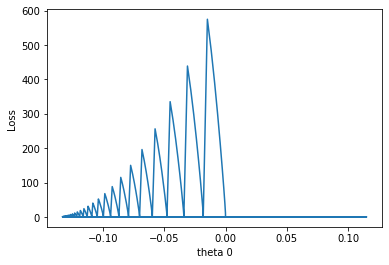

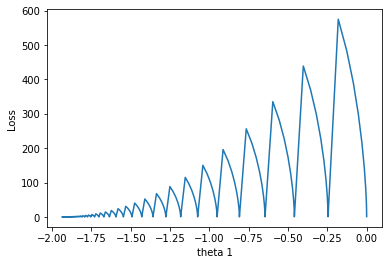

In [24]:
iterations = 1000 * 10
plots(iterations, costs, thetas_0, thetas_1)

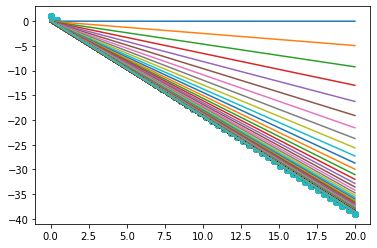

In [25]:
plot_regression_lines(thetas_0, thetas_1, iterations)

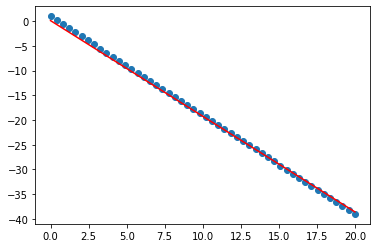

In [26]:
plot_best_line(thetas_0, thetas_1)

In [27]:
batch_size = 10
alpha = 0.0001
epochs = 1000
costs, thetas_0, thetas_1 = mini_batch(X, y, alpha, epochs, batch_size)

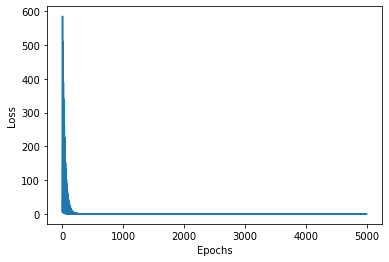

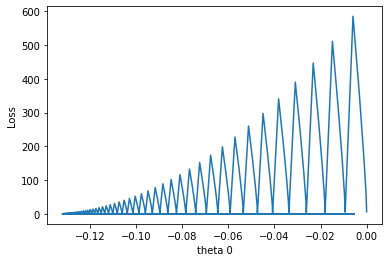

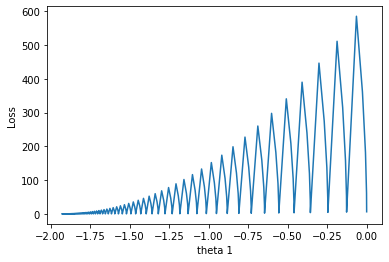

In [28]:
iterations = 1000 * 5
plots(iterations, costs, thetas_0, thetas_1)

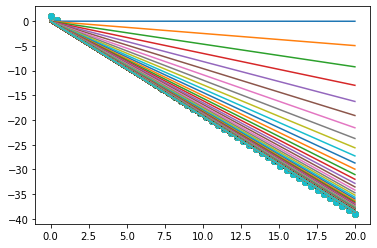

In [29]:
plot_regression_lines(thetas_0, thetas_1, iterations)

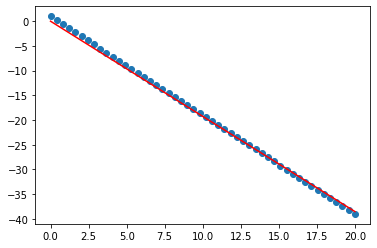

In [30]:
plot_best_line(thetas_0, thetas_1)

In [31]:
batch_size = 50
alpha = 0.0001
epochs = 1000
costs, thetas_0, thetas_1 = mini_batch(X, y, alpha, epochs, batch_size)

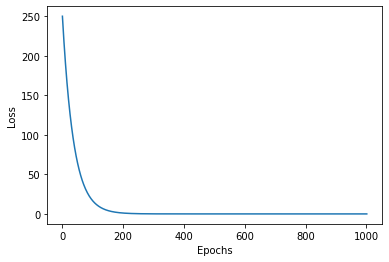

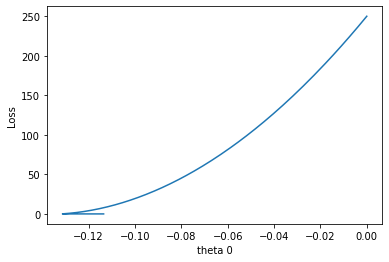

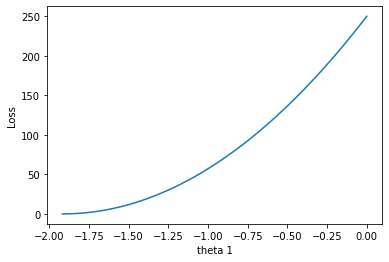

In [32]:
iterations = 1000
plots(iterations, costs, thetas_0, thetas_1)

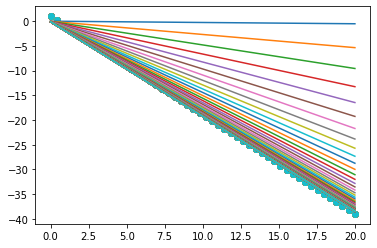

In [33]:
plot_regression_lines(thetas_0, thetas_1, iterations)

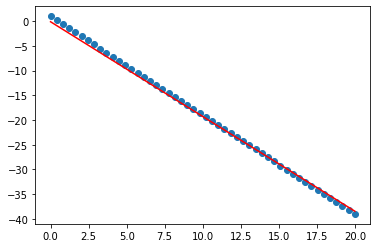

In [34]:
plot_best_line(thetas_0, thetas_1)

In [35]:
batch_size = 1
alpha = 0.0001
epochs = 1000
costs, thetas_0, thetas_1 = mini_batch(X, y, alpha, epochs, batch_size)

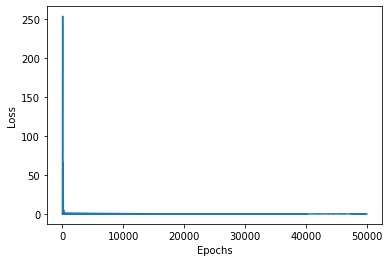

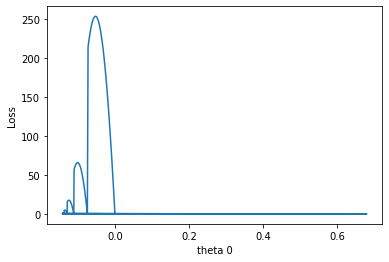

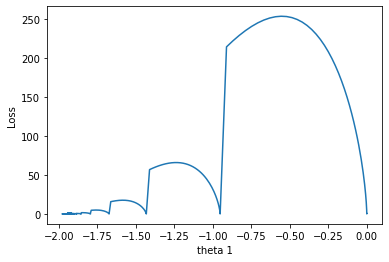

In [36]:
iterations = 50000
plots(iterations, costs, thetas_0, thetas_1)

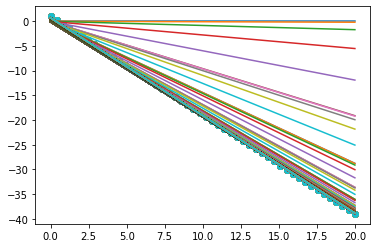

In [37]:
plot_regression_lines(thetas_0, thetas_1, iterations)

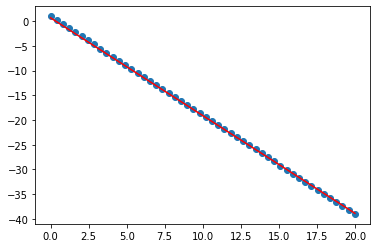

In [38]:
plot_best_line(thetas_0, thetas_1)

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and repeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [39]:
def stochastic_GD(X, y, alpha, epochs):
    batch_size = 1
    theta_0, theta_1 = 0, 0
    costs, thetas_0, thetas_1 = [], [], []
    thetas_0.append(theta_0)
    thetas_1.append(theta_1)
    X_batches = np.array([X[i:i + batch_size] for i in range(0, len(X), batch_size)])
    y_batches = np.array([y[i:i + batch_size] for i in range(0, len(y), batch_size)])
    for j in range(epochs):
        for i in range(X_batches.shape[0]):
            hypothesis = theta_0 + (theta_1 * X_batches[i])

            cost = (1/(2*batch_size)) * ((np.linalg.norm(hypothesis - y_batches[i]))**2)
            costs.append(cost)
            
            error = hypothesis - y_batches[i]
            gradient = [1/batch_size * error.sum() , 1/batch_size *  error@X_batches[i]]

            theta_0 = theta_0 - alpha * gradient[0]
            theta_1 = theta_1 - alpha * gradient[1]

            thetas_0.append(theta_0)
            thetas_1.append(theta_1)
    cost = (1/(2*batch_size)) * ((np.linalg.norm(hypothesis - y_batches[i]))**2)
    costs.append(cost)
    return costs, thetas_0, thetas_1

In [40]:
alpha = 0.0001
epochs = 1000
costs, thetas_0, thetas_1 = stochastic_GD(X, y, alpha, epochs)

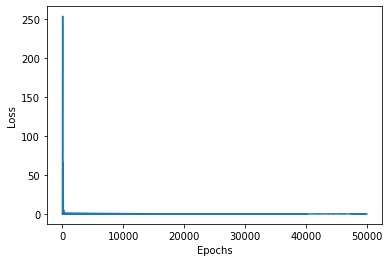

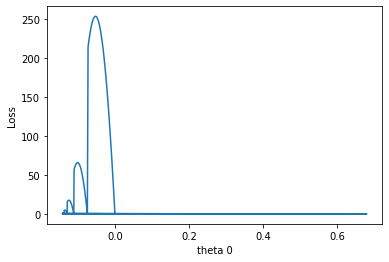

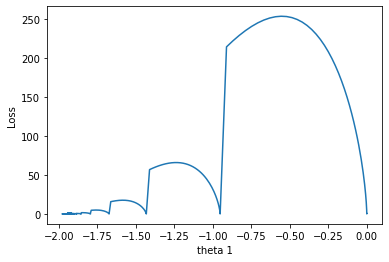

In [41]:
iterations = 50000
plots(iterations, costs, thetas_0, thetas_1)

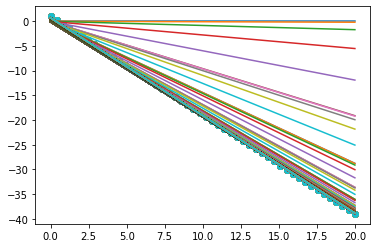

In [42]:
plot_regression_lines(thetas_0, thetas_1, iterations)

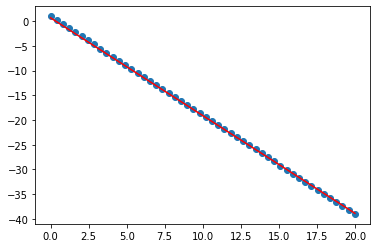

In [43]:
plot_best_line(thetas_0, thetas_1)